In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from scipy import special,linalg,interpolate
import cmath
import math

In [2]:
global n1,n2nc0,eps0,mu0,a,m,w,k0

n1 = 1.5
n2 = 1.0
c0 = 3e8
eps0 = 8.854187e-12
mu0 = 1.256637e-6
#a = 5e-6
m = 1

In [3]:
def tot_power(A,B,C,D,beta,p,q,jj):
    global n1,n2,c0,eps0,mu0,a,m,w,k0
    res_r = 800
    r = np.array([np.linspace(0.01*a,80*a,res_r)])
    dr = (r[0][len(r[0]) - 1]-r[0][0])/(res_r+1)
    power = 0
    for j in range(0,res_r):
        J1 = sp.special.jv(m, r[0][j]*p)
        K1 = sp.special.kv(m, r[0][j]*q)
        dJ1 = 0.5*(sp.special.jv(m-1,r[0][j]*p) - sp.special.jv(m+1,r[0][j]*p))
        dK1 = -0.5*(sp.special.kv(m-1,r[0][j]*q) + sp.special.kv(m+1,r[0][j]*q))
        point_r = r[0][j]
        point_phi = 0
        point_z = 0
        
        EH_array = field_calc(A,B,C,D,beta,p,q,J1,dJ1,K1,dK1,point_r,point_phi,point_z)
        
        E_r = EH_array[0]
        E_phi = EH_array[1]
        E_z = EH_array[2]
        H_r = EH_array[3]
        H_phi = EH_array[4]
        H_z = EH_array[5]
        
        power = power + 2*np.pi*r[0][j]*dr*(1/2)*(E_r*np.conj(H_phi)-E_phi*np.conj(H_r))
        
    return power

In [4]:
def field_calc( A, B, C, D, beta, p, q, J1, dJ1, K1, dK1, point_r,point_phi,point_z ):
    global n1,n2,c0,eps0,mu0,a,m,w,k0

    E_r =  A*1j*beta/p[0][0]*dJ1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) - B[0][0]*mu0*w[0][0]*m/p[0][0]**2/point_r*J1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)
    
    E_phi=  -A*beta*m/p**2/point_r*J1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) - B*1j*mu0*w/p*dJ1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)

    E_z=    A*J1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z);

    H_r=    A*eps0*n1**2*w*m/p**2/point_r*J1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) + B*1j*beta/p*dJ1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)

    H_phi=  A*1j*eps0*n1**2*w/p*dJ1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) - B*beta*m/p**2/point_r*J1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)

    H_z=    B*J1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)
    
    if(type(point_r) == int):
        if(point_r > a):
            E_r = -C*1j*beta/q*dK1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) + D*mu0*w*m/q**2/point_r*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)
            E_phi = C*beta*m/q**2/point_r*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) + D*1j*mu0*w/q*dK1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)
            E_z= C*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)
            H_r = -C*eps0*n2**2*w*m/q**2/point_r*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) - D*1j*beta/q*dK1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)
            H_phi = -C*1j*eps0*n2**2*w/q*dK1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) + D*beta*m/q**2/point_r*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)
            H_z = D*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z)
        else:
            E_r = E_r
            E_phi = E_phi
            E_z = E_z
            H_r = H_r
            H_phi = H_phi
            H_z = H_z
            
    else:
        dummy = (point_r > a).astype(int)
        dummy_inv = (point_r < a).astype(int)
        dummy = dummy*(-C*1j*beta/q*dK1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) + D*mu0*w*m/q**2/point_r*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z))
        dummy_inv = E_r * dummy_inv
        E_r = dummy + dummy_inv
        
        dummy = (point_r > a).astype(int)
        dummy_inv = (point_r < a).astype(int)
        dummy = dummy*(C*beta*m/q**2/point_r*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) + D*1j*mu0*w/q*dK1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z))
        dummy_inv = E_phi * dummy_inv
        E_phi = dummy + dummy_inv
        
        dummy = (point_r > a).astype(int)
        dummy_inv = (point_r < a).astype(int)
        dummy = dummy*(C*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z))
        dummy_inv = E_z * dummy_inv
        E_z = dummy + dummy_inv
        
        dummy = (point_r > a).astype(int)
        dummy_inv = (point_r < a).astype(int)
        dummy = dummy*(-C*eps0*n2**2*w*m/q**2/point_r*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) - D*1j*beta/q*dK1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z))
        dummy_inv = H_r * dummy_inv
        H_r = dummy + dummy_inv
        
        dummy = (point_r > a).astype(int)
        dummy_inv = (point_r < a).astype(int)
        dummy = dummy*(-C*1j*eps0*n2**2*w/q*dK1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z) + D*beta*m/q**2/point_r*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z))
        dummy_inv = H_phi * dummy_inv
        H_phi = dummy + dummy_inv
        
        
        dummy = (point_r > a).astype(int)
        dummy_inv = (point_r < a).astype(int)
        dummy = dummy*(D*K1*np.exp(1j*m*point_phi)*np.exp(1j*beta*point_z))
        dummy_inv = H_z * dummy_inv
        H_z = dummy + dummy_inv
        
        
        
    return [E_r,E_phi,E_z,H_r,H_phi,H_z,point_r,point_phi,point_z]

In [5]:
alpha_ee = (1.2+1j*0.1)*(10e-9)**3
alpha_em = 0.01*(10e-9)**3
alpha_mm = 0.0002*(10e-9)**3

res_a = 50
mat_a = np.array([np.linspace(0.7e-6,2e-6,res_a)])
res_w = 1
res_beta = 20000

In [6]:
if res_w == 1:
    mat_w = np.array([np.linspace(0.05e15, 2*np.pi*c0/5e-6, 2)])
    mat_w = np.array([[mat_w[0][1]]])
else:
    mat_w = np.array([np.linspace(0.05e15, 2*np.pi*c0/5e-6, res_w)])

In [7]:
mat_w[0][0]

376991118430775.1

In [8]:
mat_k0 = mat_w/c0

F1 = np.zeros((3,mat_a.shape[1]),dtype = complex)
F2 = np.zeros((3,mat_a.shape[1]),dtype = complex)
F3 = np.zeros((3,mat_a.shape[1]),dtype = complex)
F4 = np.zeros((3,mat_a.shape[1]),dtype = complex)
F5 = np.zeros((3,mat_a.shape[1]),dtype = complex)
F6 = np.zeros((3,mat_a.shape[1]),dtype = complex)
F7 = np.zeros((3,mat_a.shape[1]),dtype = complex)
F8 = np.zeros((3,mat_a.shape[1]),dtype = complex)
F_tot = np.zeros((3,mat_a.shape[1]), dtype= complex)

error_min_dummy = np.array([[]])
error_min_index_dummy = np.array([[]],dtype = int)
out_beta = np.array([[]])

In [9]:
for jj in range(0,mat_a.shape[1]):
    a = mat_a[0][jj]
    w = mat_w
    lambda_matrix = np.array([2*np.pi*c0*w])
    k0 = w/c0
    mat_V = k0*a*(n1**2 - n2**2)**0.5
    
    beta = np.array([np.linspace(n2*k0[0][0]*1.0000001 , n1*k0[0][0]*0.999999, res_beta)])
    p = (n1**2*k0**2 -beta**2)**0.5
    q = (beta**2 - n2**2*k0**2)**0.5
    J1 = sp.special.jv(m,a*p)
    K1 = sp.special.kv(m,a*q)
    dJ1 = 0.5*(sp.special.jv(m-1,a*p) - sp.special.jv(m+1,a*p))
    dK1 = -0.5*(sp.special.kv(m-1,a*q) + sp.special.kv(m+1,a*q))
    
    error = (dJ1/p/J1 + dK1/q/K1)*(dJ1/p/J1 + n2**2/n1**2*dK1/q/K1) - m**2/a**2*(1/p**2 + 1/q**2)*(1/p**2 + n2**2/n1**2/q**2)
    error_min = np.amin(abs(error))
    error_min_dummy = np.append(error_min_dummy, error_min)
    error_min_index =  np.where(abs(error) == error_min)
    error_min_index_dummy = np.append(error_min_index_dummy,error_min_index[1][0])
    out_beta = np.append(out_beta,beta[0][error_min_index_dummy[jj]])

    J1 = 0
    p =0
    q = 0
    beta = 0
    K1 = 0
    dJ1 = 0
    dK1 = 0
    
    beta = out_beta[jj]
    beta_normal = out_beta[jj] 
    mat_b = (beta/k0 - n2)/(n1-n2)
    
    p = (n1**2*k0**2 -beta**2)**0.5
    q = (beta**2 - n2**2*k0**2)**0.5
    J1 = sp.special.jv(m,a*p)
    K1 = sp.special.kv(m,a*q)
    dJ1 = 0.5*(sp.special.jv(m-1,a*p) - sp.special.jv(m+1,a*p))
    dK1 = -0.5*(sp.special.kv(m-1,a*q) + sp.special.kv(m+1,a*q))
    
    A = 1
    B = -A*J1*beta*m*(1/p**2 + 1/q**2)/a/1j/w/mu0/(np.dot(J1/K1,dK1/q) + dJ1/p)
    C = A*J1/K1
    D = B*J1/K1

    mat_b = B
    mat_c = C
    matD = D
    
    power = tot_power(A,B,C,D,beta,p,q,jj)
    
    J1 = 0
    K1 = 0
    dJ1 = 0
    dK1 = 0
    
    r = 1.0*a+100e-9
    
    A = A/np.sqrt(1e6*power)
    B = B/np.sqrt(1e6*power)
    C = C/np.sqrt(1e6*power)
    D = D/np.sqrt(1e6*power)
    
    K1 = sp.special.kn(m,r*q)
    dK1 = -0.5*(sp.special.kn(m-1, r*q) + sp.special.kn(m+1,r*q))
    ddK1 = 0.25*(sp.special.kn(m-2,r*q) + 2*sp.special.kn(m,r*q) + sp.special.kn(m+2 ,r*q))
    F1[0][jj] = 1/4*(alpha_ee.real*( 2*abs(C)**2*q*K1*dK1+2*(abs(C)**2*beta**2/q+abs(D)**2*mu0**2*w**2/q)*dK1*ddK1+2*(abs(D)**2*mu0**2*w**2*m**2/q**4+abs(C)**2*beta**2*m**2/q**4)*(-K1**2/r**3+q*K1*dK1/r**2)+(-2*C*np.conj(D)+2*np.conj(C)*D)*1j*beta*mu0*w*m/q**3*(-K1*dK1/r**2+q*dK1**2/r+q*K1*ddK1/r))\
                + alpha_mm.real*( 2*abs(D)**2*q*K1*dK1+2*(abs(D)**2*beta**2/q+abs(C)**2*eps0**2*n2**4*w**2/q)*dK1*ddK1+2*(abs(C)**2*eps0**2*n2**4*w**2*m**2/q**4+abs(D)**2*beta**2*m**2/q**4)*(-K1**2/r**3+q*K1*dK1/r**2)+(-2*C*np.conj(D)+2*np.conj(C)*D)*1j*beta*eps0*n2**2*w*m/q**3*(-K1*dK1/r**2+q*dK1**2/r+q*K1*ddK1/r))\
                - 2*alpha_em.real*((-2*abs(C)**2*eps0*n2**2-2*abs(D)**2*mu0)*1j*beta*w*m/q**3*(-K1*dK1/r**2+q*dK1**2/r+q*K1*ddK1/r)+2*(np.conj(C)*D*beta**2/q**2-C*np.conj(D)*mu0*w**2*eps0*n2**2/q**2)*q*dK1*ddK1+2*(-C*np.conj(D)*mu0*w**2*eps0*n2**2*m**2/q**4+np.conj(C)*D*beta**2*m**2/q**4)*(-K1**2/r**3+q*K1*dK1/r**2)+2*np.conj(C)*D*q*K1*dK1).imag)
    F1[1][jj] = 0
    F1[2][jj] = 0
    
    F2[0][jj] = 0
    F2[1][jj] = (k0/eps0*(alpha_ee).imag+k0/mu0*(alpha_mm).imag-c0**2*k0**4/6/np.pi*((alpha_ee*np.conj(alpha_mm)).real+abs(alpha_em)**2))/c0*0.5*((-abs(C)**2*eps0*n2**2*w*m/q**2/r-abs(D)**2*mu0*w*m/q**2/r)*K1**2+2*C*np.conj(D)*1j*beta/q*K1*dK1)
    F2[2][jj] = (k0/eps0*(alpha_ee).imag+k0/mu0*(alpha_mm).imag-c0**2*k0**4/6/np.pi*((alpha_ee*np.conj(alpha_mm)).real+abs(alpha_em)**2))/c0*0.5*((abs(C)**2*eps0*n2**2+abs(D)**2*mu0)*beta*w/q**2*(dK1**2+m**2*K1**2/q**2/r**2)+2*(-C*np.conj(D)*beta**2+D*np.conj(C)*mu0*eps0*n2**2*w**2)*1j*m/q**3/r*K1*dK1)
    
    F3[0][jj] = 0
    F3[1][jj] = -(alpha_em).imag*(-1/2)*( 2*(abs(C)**2*eps0*n2**2+abs(D)**2*mu0)*beta*w/q**2*(q*dK1*ddK1+m**2/q/r**2*K1*dK1-m**2*K1**2/q**2/r**3)+2*(-C*np.conj(D)*beta**2+D*np.conj(C)*mu0*eps0*n2**2*w**2)*1j*m/q**3*(q*dK1**2/r+q*K1*ddK1/r-K1*dK1/r**2) )
    F3[2][jj] = -(alpha_em).imag/r*( -(abs(C)**2*eps0*n2**2+abs(D)**2*mu0)*w*m/q*K1*dK1+C*np.conj(D)*1j*beta*(1/q*K1*dK1+r*dK1**2+r*K1*ddK1) )
    
    F4[0][jj] = 0 
    F4[1][jj] = c0*k0/eps0*(alpha_ee).imag*(-eps0)/2/w/1j*( (-abs(C)**2*beta**2-abs(D)**2*mu0**2*w**2)*1j*m/q**3*(q*dK1**2/r+q*K1*ddK1/r-K1*dK1/r**2)-2*C*np.conj(D)*beta*mu0*w/q*dK1*ddK1+2*D*np.conj(C)*mu0*beta*w*m**2/q**4*(q*K1*dK1/r**2-K1**2/r**3) )
    F4[2][jj] = c0*k0/eps0*(alpha_ee).imag*eps0/2/w/1j/r*( abs(C)**2*1j*beta/q*(q*r*dK1**2+q*r*K1*ddK1+K1*dK1)+2*C*np.conj(D)*mu0*w*m/q*K1*dK1 )
    
    F5[0][jj] = 0
    F5[1][jj] = c0*k0/mu0*(alpha_mm).imag*(-mu0)/2/w/1j*( (-abs(C)**2*eps0**2*n2**4*w**2-abs(D)**2*beta**2)*1j*m/q**3*(q*dK1**2/r+q*K1*ddK1/r-K1*dK1/r**2)-2*C*np.conj(D)*eps0*n2**2*w*beta*m**2/q**4*(q*K1*dK1/r**2-K1**2/r**3)+2*D*np.conj(C)*eps0*n2**2*beta*w/q*K1*dK1 )
    F5[2][jj] = c0*k0/mu0*(alpha_mm).imag*mu0/2/w/1j/r*( abs(D)**2*1j*beta/q*(q*r*dK1**2+q*r*K1*ddK1+K1*dK1)-2*D*np.conj(C)*eps0*n2**2*w*m/q*K1*dK1 )
    
    F6[0][jj] = 0
    F6[1][jj] = w*(-2*w*(alpha_em).imag+c0*k0**4/3/np.pi/eps0*(alpha_ee*np.conj(alpha_em)).real)*eps0/2/w/1j*(abs(C)**2*1j*beta/q*K1*dK1+C*np.conj(D)*mu0*w*m/q**2/r*K1**2)
    F6[2][jj] = w*(-2*w*(alpha_em).imag+c0*k0**4/3/np.pi/eps0*(alpha_ee*np.conj(alpha_em)).real)*eps0/2/w/1j*( (-abs(C)**2*beta**2-abs(D)**2*mu0**2*w**2)*1j*m/q**3/r*K1*dK1-C*np.conj(D)*beta*mu0*w/q**2*dK1**2+D*np.conj(C)*beta*mu0*w*m**2/q**4/r**2*K1**2 )
    
    F7[0][jj] = 0
    F7[1][jj] = w*(-2*w*(alpha_em).imag+c0*k0**4/3/np.pi/mu0*(alpha_mm*np.conj(alpha_em)).real)*mu0/2/w/1j*(-D*np.conj(C)*eps0*n2**2*w*m/q**2/r*K1**2+abs(D)**2*1j*beta/q*K1*dK1)
    F7[2][jj] = w*(-2*w*(alpha_em).imag+c0*k0**4/3/np.pi/mu0*(alpha_mm*np.conj(alpha_em)).real)*mu0/2/w/1j*((-abs(C)**2*eps0**2*n2**4*w**2-abs(D)**2*beta**2)*1j*m/q**3/r*K1*dK1-C*np.conj(D)*eps0*n2**2*w*beta*m**2/q**4/r**2*K1**2+D*np.conj(C)*beta*eps0*n2**2*w/q**2*dK1**2 )
    
    F8[0][jj] = c0*k0**4/12/np.pi*(alpha_ee*np.conj(alpha_mm)).imag*(abs(D)**2*mu0-abs(C)**2*eps0*n2**2)*w/q*K1*dK1;
    F8[1][jj] = 0
    F8[2][jj] = 0
    
    F_tot[0][jj] = F1[0, jj]+F2[0, jj]+F3[0, jj]+F4[0, jj]+F5[0, jj]+F6[0, jj]+F7[0, jj]+F8[0, jj]
    F_tot[1][jj] = F1[1, jj]+F2[1, jj]+F3[1, jj]+F4[1, jj]+F5[1, jj]+F6[1, jj]+F7[1, jj]+F8[1, jj]
    F_tot[2][jj] = F1[2, jj]+F2[2, jj]+F3[2, jj]+F4[2, jj]+F5[2, jj]+F6[2, jj]+F7[2, jj]+F8[2, jj]
    

In [10]:
F0_plot = F_tot[0,:].reshape(1,50)
F1_plot = F_tot[1,:].reshape(1,50)
F2_plot = F_tot[2,:].reshape(1,50)

C:\Users\Rohan\anaconda3\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


<Figure size 14400x14400 with 0 Axes>

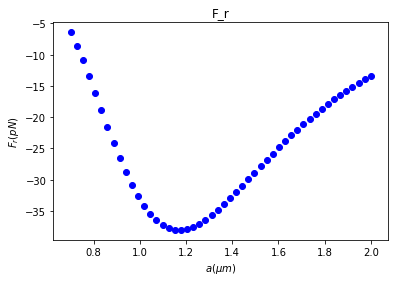

In [15]:
plt.figure(figsize = (200,200))
fig, ax = plt.subplots()
q = ax.scatter(1e6*mat_a,1e12*(F0_plot),color = "Blue")
plt.title('F_r')
plt.xlabel('$ a(\mu m)$')
plt.ylabel('$F_r(pN)$')
plt.savefig('force1.pdf')
plt.show()

C:\Users\Rohan\anaconda3\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


<Figure size 14400x14400 with 0 Axes>

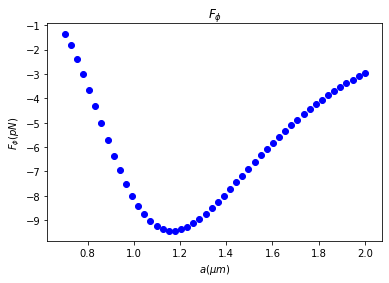

In [16]:
plt.figure(figsize = (200,200))
fig, ax = plt.subplots()
q = ax.scatter(1e6*mat_a,1e12*(F1_plot),color = "Blue")
plt.title('$F_\phi $')
plt.xlabel('$a(\mu m)$')
plt.ylabel('$F_\phi (pN)$')
plt.savefig('force2.pdf')
plt.show()

C:\Users\Rohan\anaconda3\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


<Figure size 14400x14400 with 0 Axes>

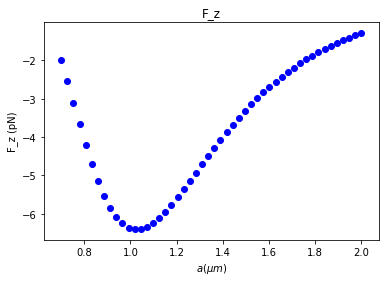

In [17]:
plt.figure(figsize = (200,200))
fig, ax = plt.subplots()
q = ax.scatter(1e6*mat_a,1e12*(F2_plot),color = "Blue")
plt.title('F_z')
plt.xlabel('$a(\mu m)$')
plt.ylabel('F_z (pN)')
plt.savefig('force3.pdf')
plt.show()